In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("EuroMart.csv", encoding = 'unicode_escape')

In [3]:
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub0Category,Product Name,Discount,Sales,Profit,Quantity
0,BN0201107407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,26,3
1,AZ0201109050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7


In [4]:
df.shape

(8047, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub0Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory usage: 1006.0+ KB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
df['day'] = df['Order Date'].dt.day
df['month']= df['Order Date'].dt.month
df['year']= df['Order Date'].dt.year

In [8]:
df.duplicated().sum()

2

In [9]:
df.loc[df.duplicated(),:]

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub0Category,Product Name,Discount,Sales,Profit,Quantity,day,month,year
2543,AZ0201205907386,2012-08-29,Louie Knight,Belgium,Antwerp,Mechelen,Central,Consumer,Economy,Office Supplies,Art,"Sanford Pens, Fluorescent",0.0,37,10,3,29,8,2012
4066,AZ0201305637964,2013-06-14,Cynthia Zielinski,Spain,Madrid,Madrid,South,Home Office,Economy,Office Supplies,Binders,"Wilson Jones 30Hole Punch, Economy",0.0,84,28,3,14,6,2013


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.rename(columns = {'Sub0Category' : 'Sub Category'},inplace = True)

# Orders by Region

In [12]:
x = df['Region'].value_counts().index
y = df['Region'].value_counts().values

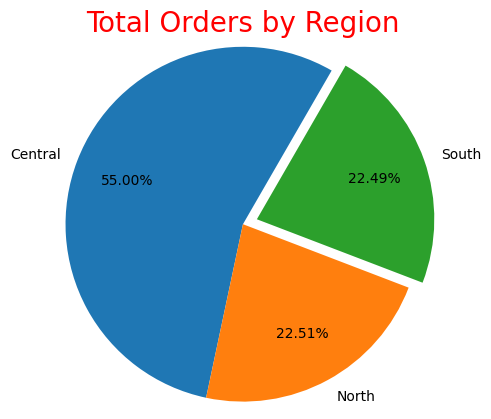

In [13]:
plt.pie(y,labels = x, autopct = "%.2f%%", radius = 1.2, pctdistance = 0.7,startangle = 60,explode = (0,0,0.1))
plt.title("Total Orders by Region",color = 'red', size = 20)
plt.show()

# Sales by Country

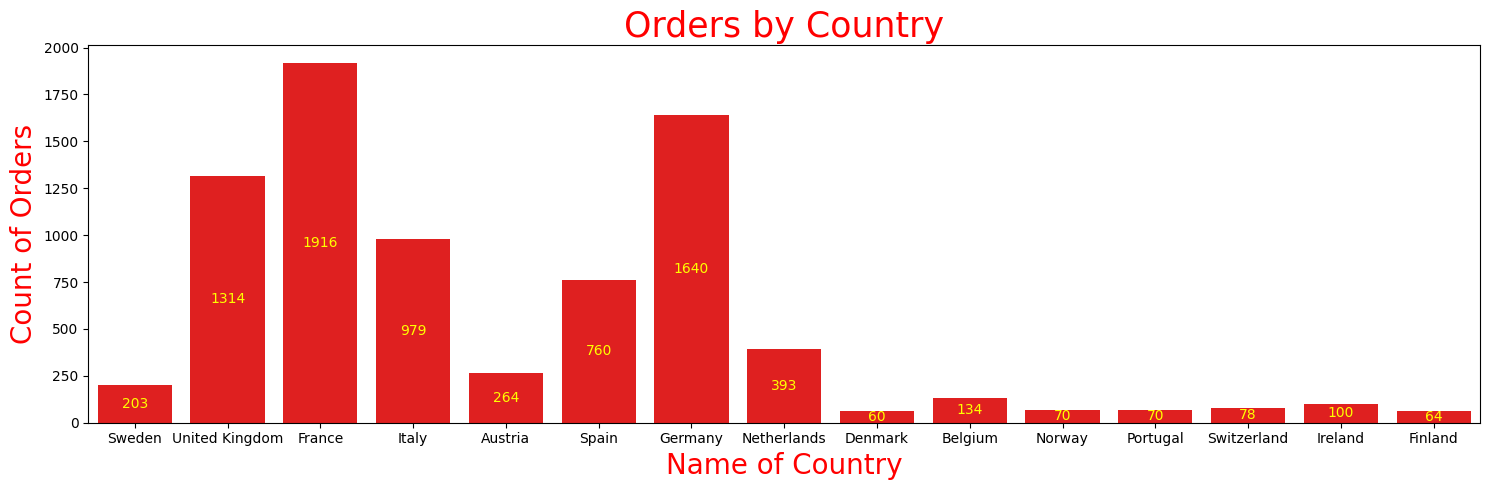

In [14]:
plt.figure(figsize = (15,5))
x = sns.countplot(x = "Country", color = "red", data = df)
for b in x.containers:
    x.bar_label(b,color = "yellow",label_type = "center")
plt.title("Orders by Country",color = "red",size = 25)
plt.xlabel("Name of Country", color = 'red', size = 20)
plt.ylabel("Count of Orders", color = "red", size = 20)
plt.tight_layout()

# Orders by Segments

In [15]:
x = df['Segment'].value_counts().index
y = df['Segment'].value_counts().values

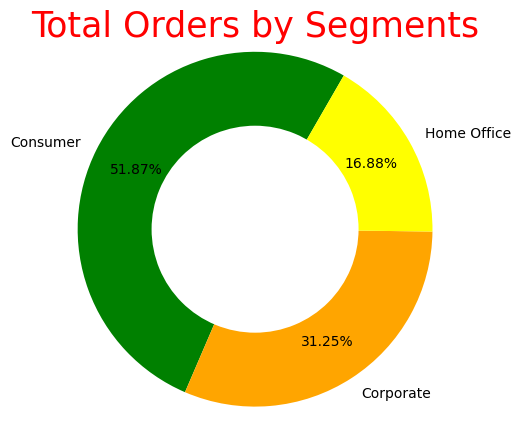

In [16]:
plt.pie(y, labels = x, autopct = "%.2f%%",colors = ["green","orange","yellow"],radius = 1.2, pctdistance =0.75,startangle = 60)
plt.pie([1], radius = 0.7, colors = 'w')
plt.title("Total Orders by Segments", color = "red", size = 25)
plt.show()

# Sub-Category by Orders

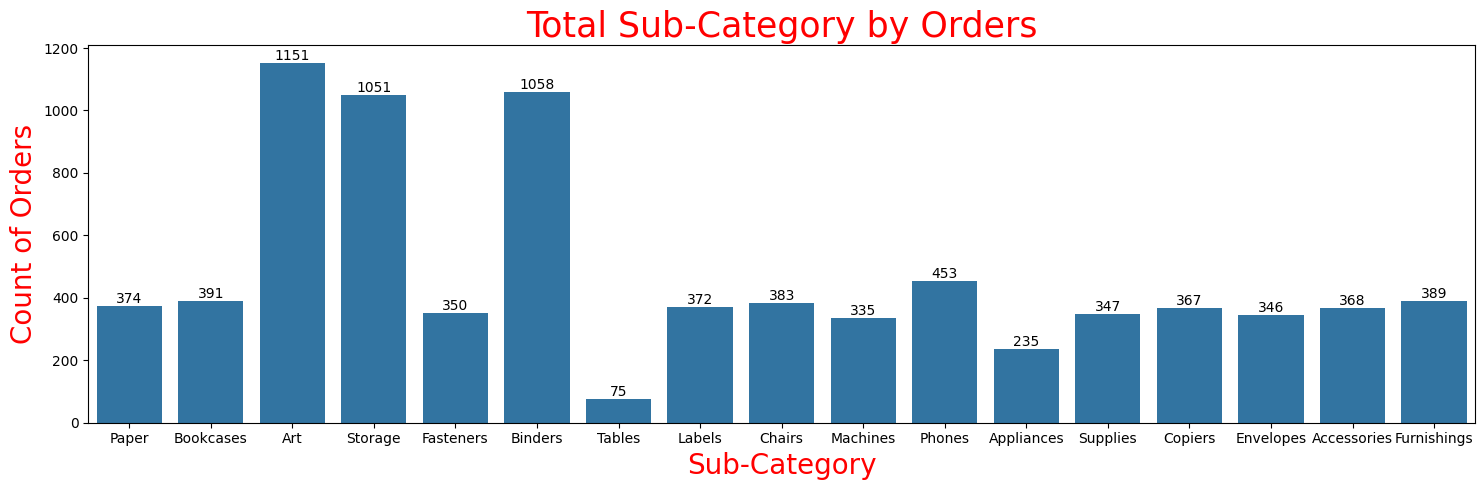

In [17]:
plt.figure(figsize = (15,5))
ax =sns.countplot(x = 'Sub Category', data = df)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sub-Category by Orders", color = "red", size = 25)
plt.xlabel("Sub-Category", color = "red", size = 20)
plt.ylabel("Count of Orders", color = "red", size = 20)
plt.tight_layout()
plt.show()

# Shiping Mode of Orders

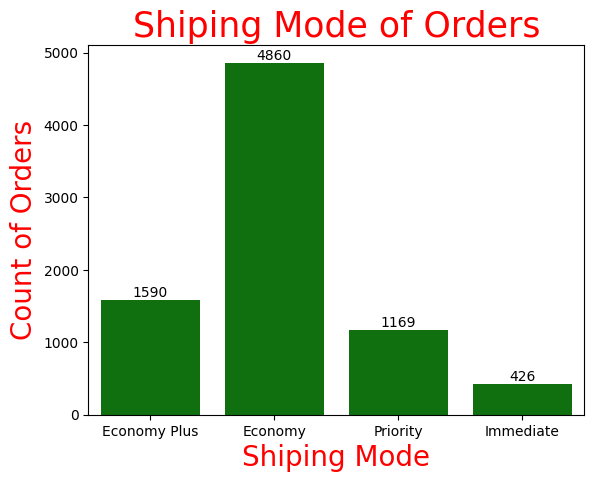

In [18]:
ax = sns.countplot(x = "Ship Mode", data = df, color = "green")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Shiping Mode of Orders", color = "red", size = 25)
plt.xlabel("Shiping Mode", color = "red", size = 20)
plt.ylabel("Count of Orders", color = "red", size = 20)
plt.show()

# Sales & Profit by Region

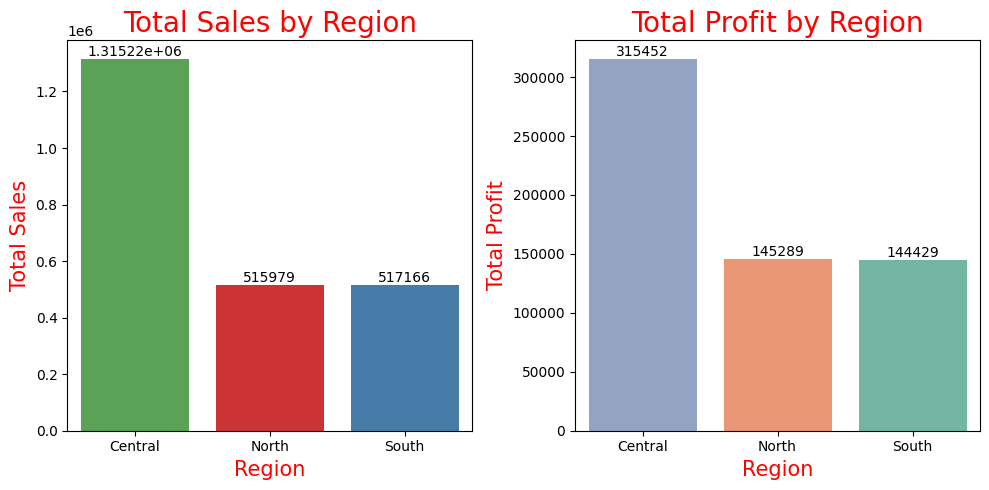

In [19]:
data = df.groupby('Region', as_index = False)[['Sales','Profit']].sum()
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
ax = sns.barplot(data = data,x = 'Region', y = 'Sales', hue = 'Sales', palette = "Set1", legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sales by Region", color = "red", size = 20)
plt.xlabel("Region", color = "red", size = 15)
plt.ylabel("Total Sales", color = "red", size = 15)
plt.subplot(1,2,2)
x = sns.barplot(data = data, x = "Region", y = 'Profit',hue = 'Profit', palette = "Set2", legend = False)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Total Profit by Region", color = "red", size = 20)
plt.xlabel("Region", color = "red", size = 15)
plt.ylabel("Total Profit", color = "red", size = 15)
plt.tight_layout()
plt.show()

# Sales & Profit by Country

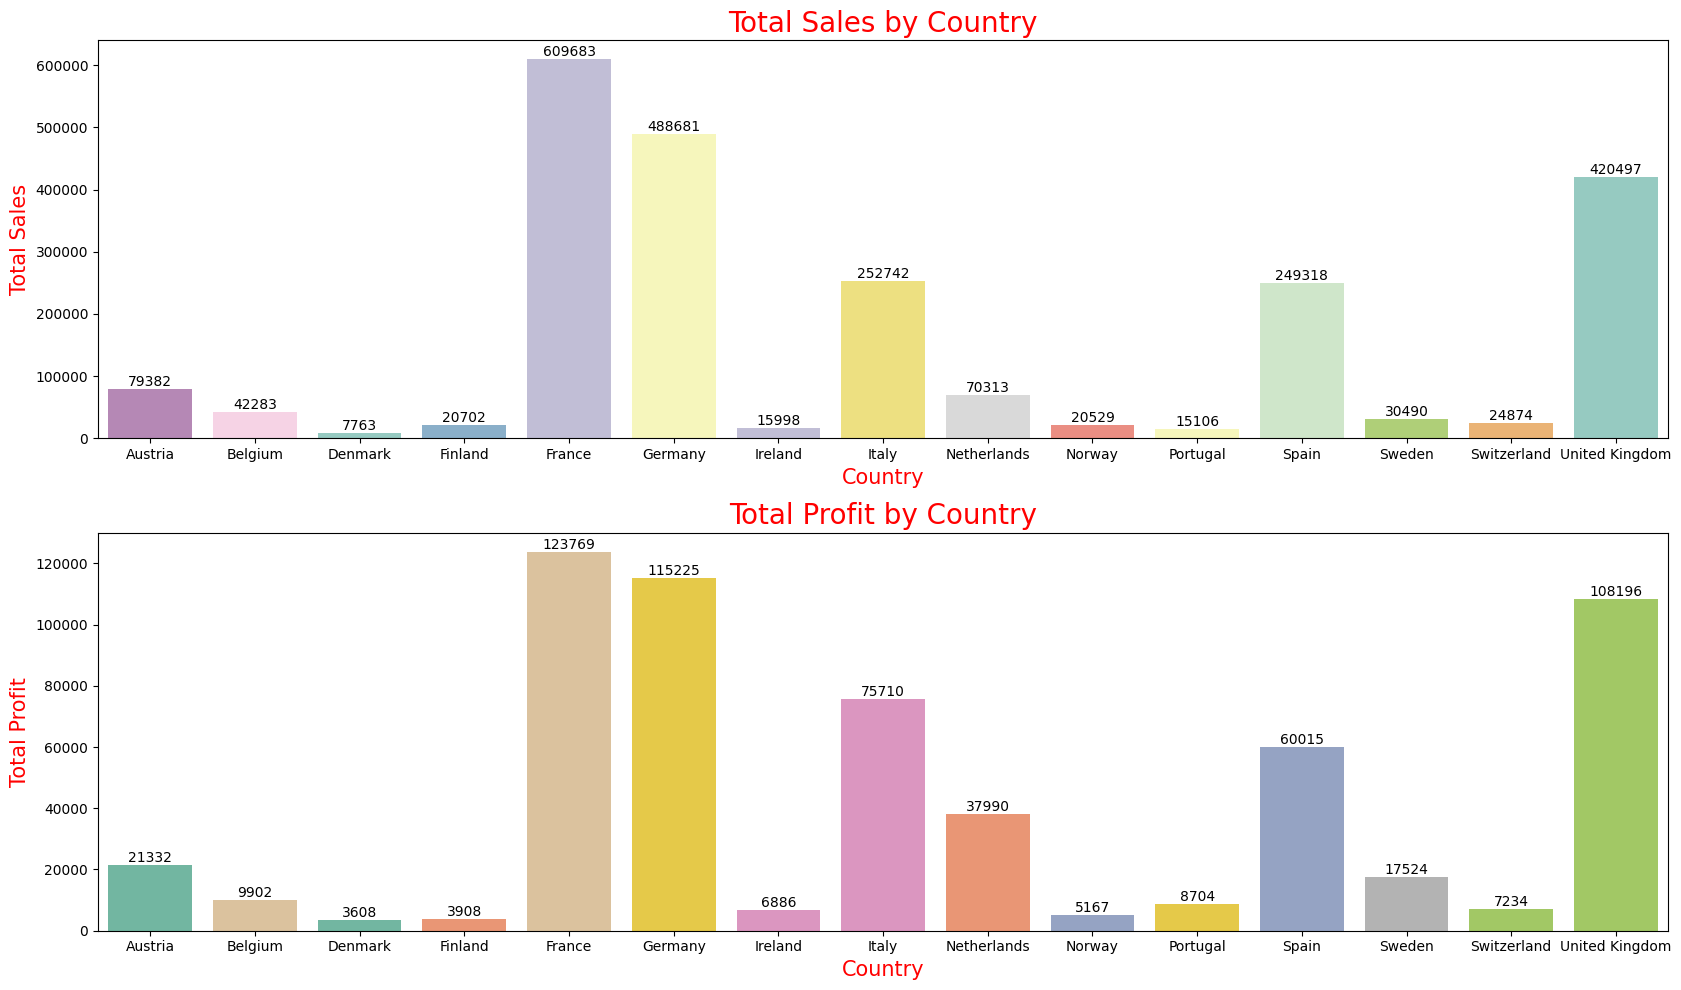

In [20]:
data1 = df.groupby('Country', as_index = False)[['Sales','Profit']].sum()
plt.figure(figsize = (17,10))
plt.subplot(2,1,1)
ax = sns.barplot(data = data1,x = 'Country', y = 'Sales', hue = 'Sales', palette = "Set3", legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sales by Country", color = "red", size = 20)
plt.xlabel("Country", color = "red", size = 15)
plt.ylabel("Total Sales", color = "red", size = 15)
plt.subplot(2,1,2)
x = sns.barplot(data = data1, x = "Country", y = 'Profit',hue = 'Profit', palette = "Set2", legend = False)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Total Profit by Country", color = "red", size = 20)
plt.xlabel("Country", color = "red", size = 15)
plt.ylabel("Total Profit", color = "red", size = 15)
plt.tight_layout()
plt.show()

# Segment by Sales & Profit

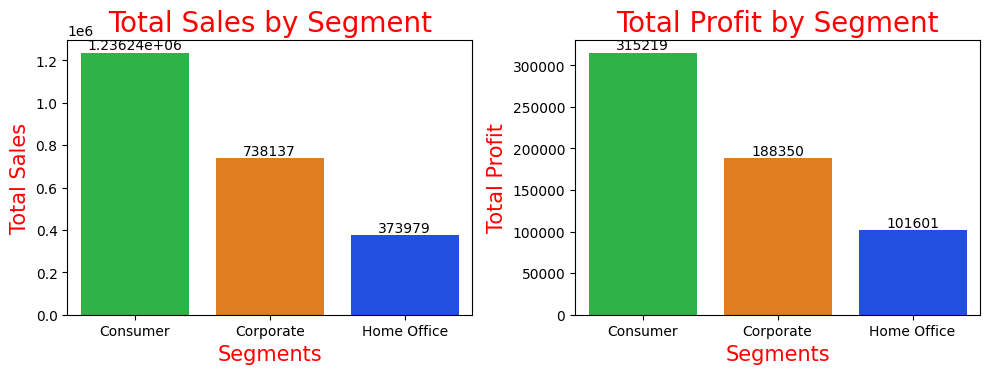

In [21]:
data2 = df.groupby('Segment', as_index = False)[['Sales','Profit']].sum()
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax = sns.barplot(data = data2,x = 'Segment', y = 'Sales', hue = 'Sales', palette = "bright", legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sales by Segment", color = "red", size = 20)
plt.xlabel("Segments", color = "red", size = 15)
plt.ylabel("Total Sales", color = "red", size = 15)
plt.subplot(1,2,2)
x = sns.barplot(data = data2, x = "Segment", y = 'Profit',hue = 'Profit', palette = "bright", legend = False)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Total Profit by Segment", color = "red", size = 20)
plt.xlabel("Segments", color = "red", size = 15)
plt.ylabel("Total Profit", color = "red", size = 15)
plt.tight_layout()
plt.show()

# Category by Sales & Profit

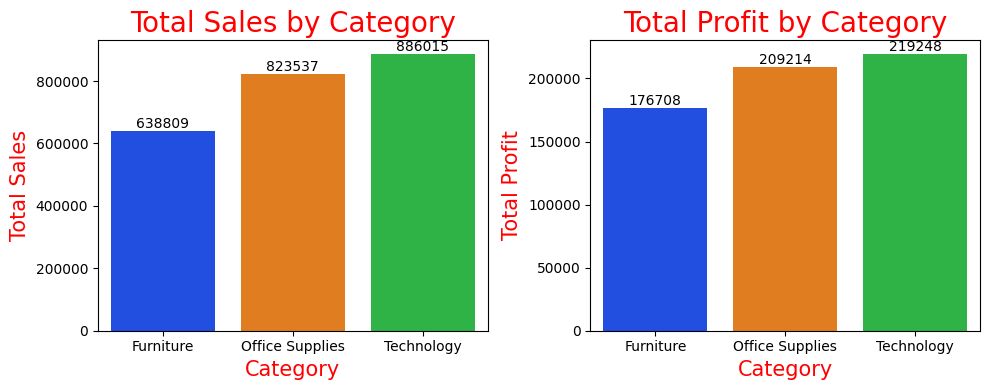

In [22]:
data3 = df.groupby('Category', as_index = False)[['Sales','Profit']].sum()
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
ax = sns.barplot(data = data3,x = 'Category', y = 'Sales', hue = 'Sales', palette = "bright", legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sales by Category", color = "red", size = 20)
plt.xlabel("Category", color = "red", size = 15)
plt.ylabel("Total Sales", color = "red", size = 15)
plt.subplot(1,2,2)
x = sns.barplot(data = data3, x = "Category", y = 'Profit',hue = 'Profit', palette = "bright", legend = False)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Total Profit by Category", color = "red", size = 20)
plt.xlabel("Category", color = "red", size = 15)
plt.ylabel("Total Profit", color = "red", size = 15)
plt.tight_layout()
plt.show()

# Sales & Profit by Sub-Category

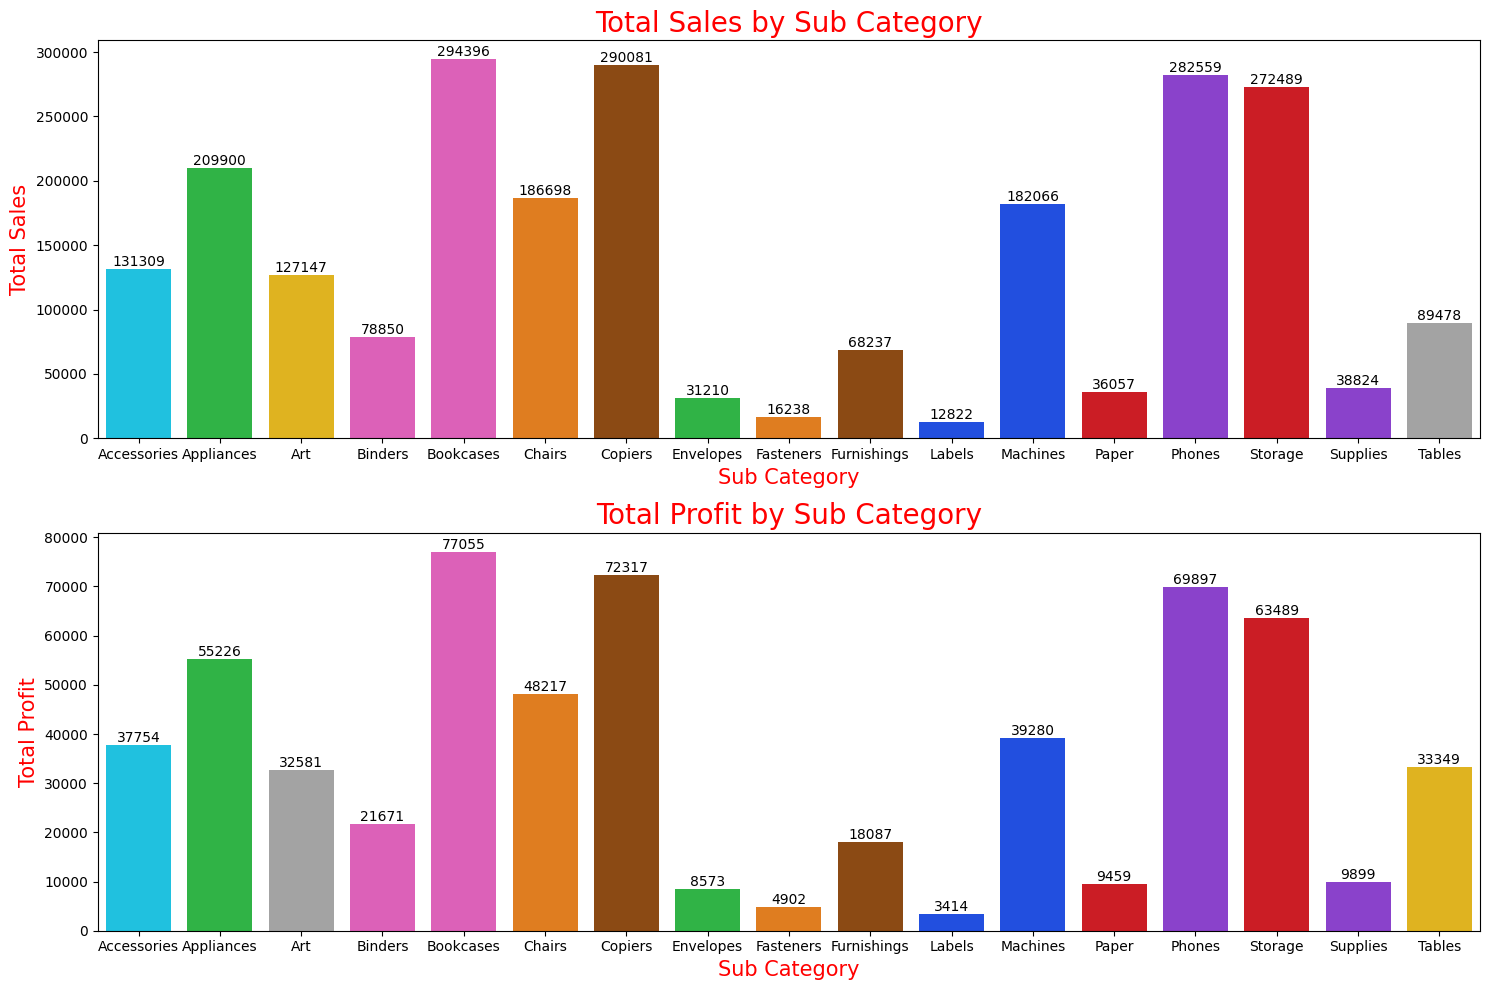

In [23]:
data4 = df.groupby('Sub Category', as_index = False)[['Sales','Profit']].sum()
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
ax = sns.barplot(data = data4,x = 'Sub Category', y = 'Sales', hue = 'Sales', palette = "bright", legend = False)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Total Sales by Sub Category", color = "red", size = 20)
plt.xlabel("Sub Category", color = "red", size = 15)
plt.ylabel("Total Sales", color = "red", size = 15)
plt.subplot(2,1,2)
x = sns.barplot(data = data4, x = "Sub Category", y = 'Profit',hue = 'Profit', palette = "bright", legend = False)
for bar in x.containers:
    x.bar_label(bar)
plt.title("Total Profit by Sub Category", color = "red", size = 20)
plt.xlabel("Sub Category", color = "red", size = 15)
plt.ylabel("Total Profit", color = "red", size = 15)
plt.tight_layout()
plt.show()

# Year by Sales & Profit

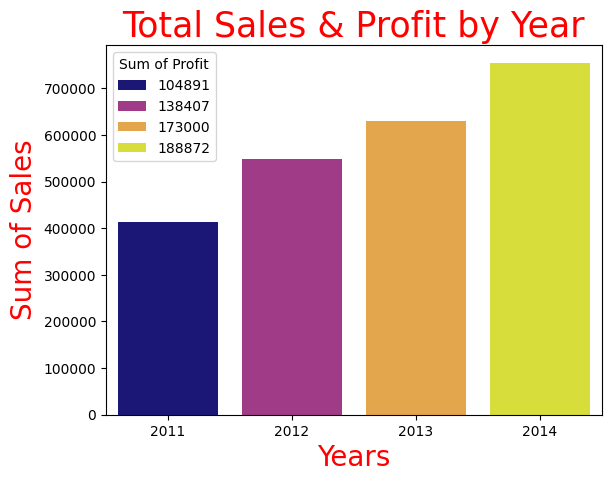

In [24]:
data5 = df.groupby('year', as_index = False)[['Sales','Profit']].sum().sort_values(by = "Profit", ascending = False)
sns.barplot(data = data5, x = 'year', y = 'Sales', hue = 'Profit', palette = 'plasma')
plt.title("Total Sales & Profit by Year", color = 'red', size = 25)
plt.xlabel("Years", color = 'red', size = 20)
plt.ylabel("Sum of Sales", color = 'red', size = 20)
plt.legend(title = 'Sum of Profit')
plt.show()

# Month by Sales & Profit

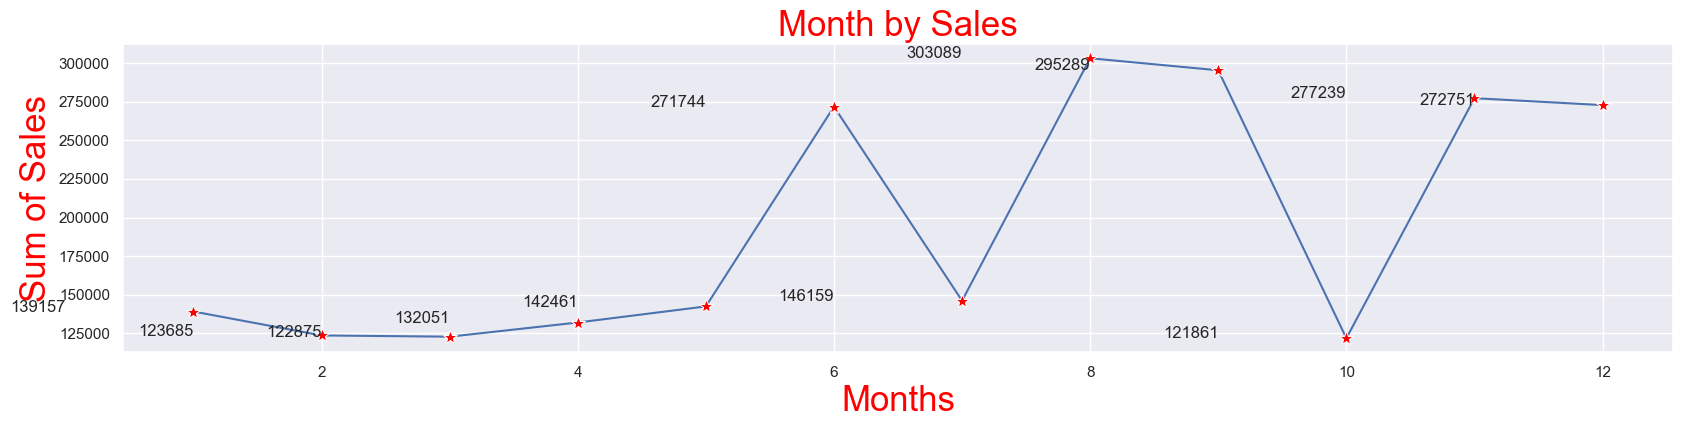

In [25]:
data6 = df.groupby('month', as_index = False)[['Sales','Profit']].sum()
sns.set(rc = {"figure.figsize":(20,4)})
ax = sns.lineplot(data = data6, x = 'month', y = 'Sales',marker = "*",markerfacecolor = "red",markersize = 10)
for i,v in enumerate(data6["Sales"]):
    ax.text(i,v,str(v),ha = "right")
plt.title("Month by Sales", color = 'red', size = 25)
plt.xlabel("Months", color = 'red', size = 25)
plt.ylabel("Sum of Sales", color = 'red', size = 25)
plt.show()

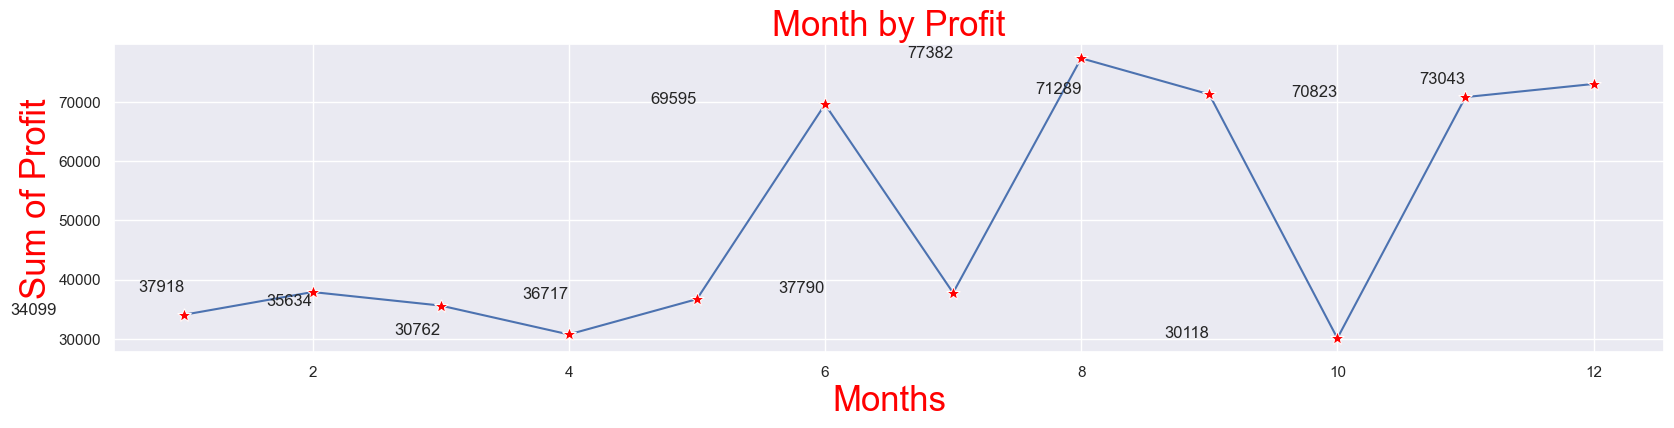

In [26]:
sns.set(rc = {"figure.figsize":(20,4)})
bx = sns.lineplot(data = data6, x = 'month', y = 'Profit',marker = "*",markerfacecolor = "red",markersize = 10)
for i,v in enumerate(data6['Profit']):
    bx.text(i,v,str(v), ha='right')
plt.title("Month by Profit", color = 'red', size = 25)
plt.xlabel("Months", color = 'red', size = 25)
plt.ylabel("Sum of Profit", color = 'red', size = 25)
plt.show()